In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from glob import glob
from cmocean import cm
import matplotlib.colors as colors
import numpy as np
import pandas as pd

#### loading data

In [2]:
path_hind = '/scratch/usr/shkifmmp/MOC/ORCA025/hind/'
# path_buoy = '/scratch/usr/shkifmmp/MOC/ORCA025/buoy/'
# path_wind = '/scratch/usr/shkifmmp/MOC/ORCA025/wind/'

In [3]:
# drake passage transport

transp_dp_h = xr.open_mfdataset(paths= sorted(glob(path_hind + 'transp_drakepassage/' + 'OR*_transports.nc'))).vtrp.squeeze()
transp_dp_w = xr.open_mfdataset(paths= sorted(glob(path_wind + 'transp_drakepassage/' + 'OR*_transports.nc'))).vtrp.squeeze()
transp_dp_b = xr.open_mfdataset(paths= sorted(glob(path_buoy + 'transp_drakepassage/' + 'OR*_transports.nc'))).vtrp.squeeze()

In [ ]:
transp_dp_h

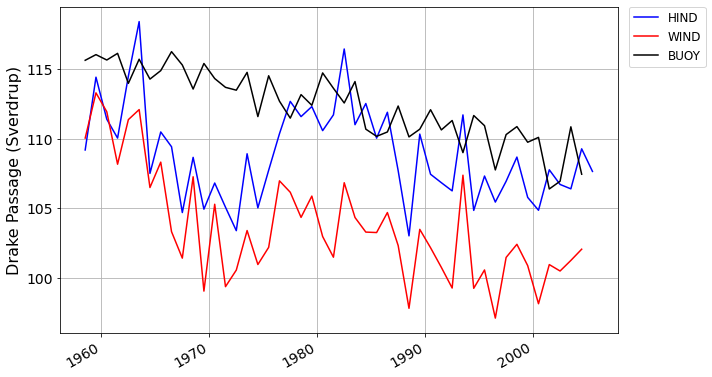

In [5]:
# plotting

fig, axs = plt.subplots(figsize = (24,8))

transp_dp_h.plot(ax=axs, label= 'HIND', color = 'blue')
transp_dp_w.plot(ax=axs, label= 'WIND', color = 'red')
transp_dp_b.plot(ax=axs, label= 'BUOY', color='k')

axs.set_xlabel(None)
axs.set_ylabel('Drake Passage (Sverdrup)', fontsize= 16)
axs.grid()

axs.xaxis.set_tick_params(labelsize = 14)
axs.yaxis.set_tick_params(labelsize = 14)

plt.gcf().set_size_inches(10, 6)
axs.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0., fontsize=12)

savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/figures/'
plt.savefig(savepath + 'ORCA025_KLP002_drake_transport.png', format='png', facecolor="w",  bbox_inches='tight', dpi= 100)

In [6]:
# EKE

eke_h = xr.open_mfdataset(paths= sorted(glob(path_hind + 'EKE/' + 'OR*EKE_k10.nc')),
                         chunks= {'y': 100, 'x': 100}).vozocrtx.squeeze()
eke_w = xr.open_mfdataset(paths= sorted(glob(path_wind + 'EKE/' + 'OR*EKE_k10.nc')),
                         chunks= {'y': 100, 'x': 100}).vozocrtx.squeeze()
eke_b = xr.open_mfdataset(paths= sorted(glob(path_buoy + 'EKE/' + 'OR*EKE_k10.nc')),
                         chunks= {'y': 100, 'x': 100}).vozocrtx.squeeze()

In [7]:
# mask 
mask = xr.open_dataset(path_hind + 'transp_drakepassage/mesh_mask.nc',
                      chunks={'y': 100, 'x': 100}).squeeze()

In [8]:
tmask = mask.tmask.isel(z=0)
e1t = mask.e1t
e2t = mask.e2t

In [9]:
area = e1t * e2t

In [10]:
def weighted_mean(variable, weight, mask):
    variable = variable.where(mask)
    weight = weight.where(mask)
    return (variable * weight).sum(('x','y')) / weight.sum(('x','y'))

In [11]:
eke_h_mean = weighted_mean(eke_h, area, tmask).compute()

eke_w_mean = weighted_mean(eke_w, area, tmask).compute()
eke_b_mean = weighted_mean(eke_b, area, tmask).compute()

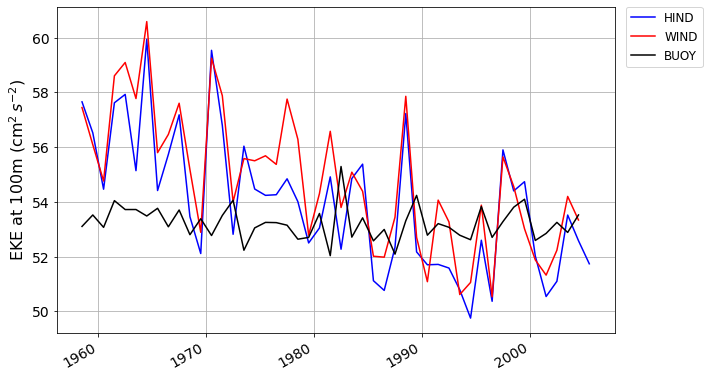

In [12]:
# plotting

fig, axs = plt.subplots(figsize = (24,8))

(eke_h_mean * 1e4).plot(ax=axs, label= 'HIND', color = 'blue')
(eke_w_mean * 1e4).plot(ax=axs, label= 'WIND', color = 'red')
(eke_b_mean * 1e4).plot(ax=axs, label= 'BUOY', color='k')

axs.set_xlabel(None)
axs.set_title(None)
axs.set_ylabel('EKE at 100m (cm$^{2}\,s^{-2}$)', fontsize= 16)
axs.grid()

axs.xaxis.set_tick_params(labelsize = 14)
axs.yaxis.set_tick_params(labelsize = 14)

plt.gcf().set_size_inches(10, 6)
axs.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0., fontsize=12)

savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/figures/'
plt.savefig(savepath + 'ORCA025_KLP002_eke.png', format='png', facecolor="w",  bbox_inches='tight', dpi=100)

### MOC

In [ ]:
# MOC

# You can plot the mean, residual and eddy MOC (using the zomsfglo variable)
# averaged over the whole time series (once the runs are finished). . Attached are two slides from the our
# presentation in June, so that you can see what I mean.

# mean MOC: yearly averaged
# residual MOC: monthly averaged then yearly averaged

In [3]:
# load data
moc_res_h = xr.open_mfdataset(paths= sorted(glob(path_hind + 'MOC/' + 'OR*from1m_mocsig2_res.nc')),
                         chunks= {'y': 100}).squeeze()
# moc_res_b = xr.open_mfdataset(paths= sorted(glob(path_buoy + 'MOC/' + 'OR*from1m_mocsig2_res.nc')),
#                          chunks= {'y': 100}).squeeze()
# moc_res_w = xr.open_mfdataset(paths= sorted(glob(path_wind + 'MOC/' + 'OR*from1m_mocsig2_res.nc')),
#                          chunks= {'y': 100}).squeeze()

moc_res5d_h = xr.open_mfdataset(paths= sorted(glob(path_hind + 'MOC/' + 'OR*from5d_mocsig2_res.nc')),
                         chunks= {'y': 100}).squeeze()
# moc_res5d_b = xr.open_mfdataset(paths= sorted(glob(path_buoy + 'MOC/' + 'OR*from5d_mocsig2_res.nc')),
#                          chunks= {'y': 100}).squeeze()
# moc_res5d_w = xr.open_mfdataset(paths= sorted(glob(path_wind + 'MOC/' + 'OR*from5d_mocsig2_res.nc')),
#                          chunks= {'y': 100}).squeeze()

moc_mean_h = xr.open_mfdataset(paths= sorted(glob(path_hind + 'MOC/' + 'OR*mocsig2_mean.nc')),
                         chunks= {'y': 100}).squeeze()
# moc_mean_b = xr.open_mfdataset(paths= sorted(glob(path_buoy + 'MOC/' + 'OR*mocsig2_mean.nc')),
#                          chunks= {'y': 100}).squeeze()
# moc_mean_w = xr.open_mfdataset(paths= sorted(glob(path_wind + 'MOC/' + 'OR*mocsig2_mean.nc')),
#                          chunks= {'y': 100}).squeeze()

In [5]:
# maps

#monthly
# map_res_h = moc_res_h.mean('time_counter').compute()
# map_res_w = moc_res_w.mean('time_counter').compute()
# map_res_b = moc_res_b.mean('time_counter').compute()

#5-day
map_res5d_h = moc_res5d_h.mean('time_counter').compute()
map_res5d_w = moc_res5d_w.mean('time_counter').compute()
map_res5d_b = moc_res5d_b.mean('time_counter').compute()

map_mean_h = moc_mean_h.mean('time_counter').compute()
map_mean_w = moc_mean_w.mean('time_counter').compute()
map_mean_b = moc_mean_b.mean('time_counter').compute()

# from 1m
# map_eddy_1m_h = map_res_h.zomsfglo - map_mean_h.zomsfglo
# map_eddy_1m_w = map_res_w.zomsfglo - map_mean_w.zomsfglo
# map_eddy_1m_b = map_res_b.zomsfglo - map_mean_b.zomsfglo

# from 55
map_eddy_5d_h = map_res5d_h.zomsfglo - map_mean_h.zomsfglo
map_eddy_5d_w = map_res5d_w.zomsfglo - map_mean_w.zomsfglo
map_eddy_5d_b = map_res5d_b.zomsfglo - map_mean_b.zomsfglo

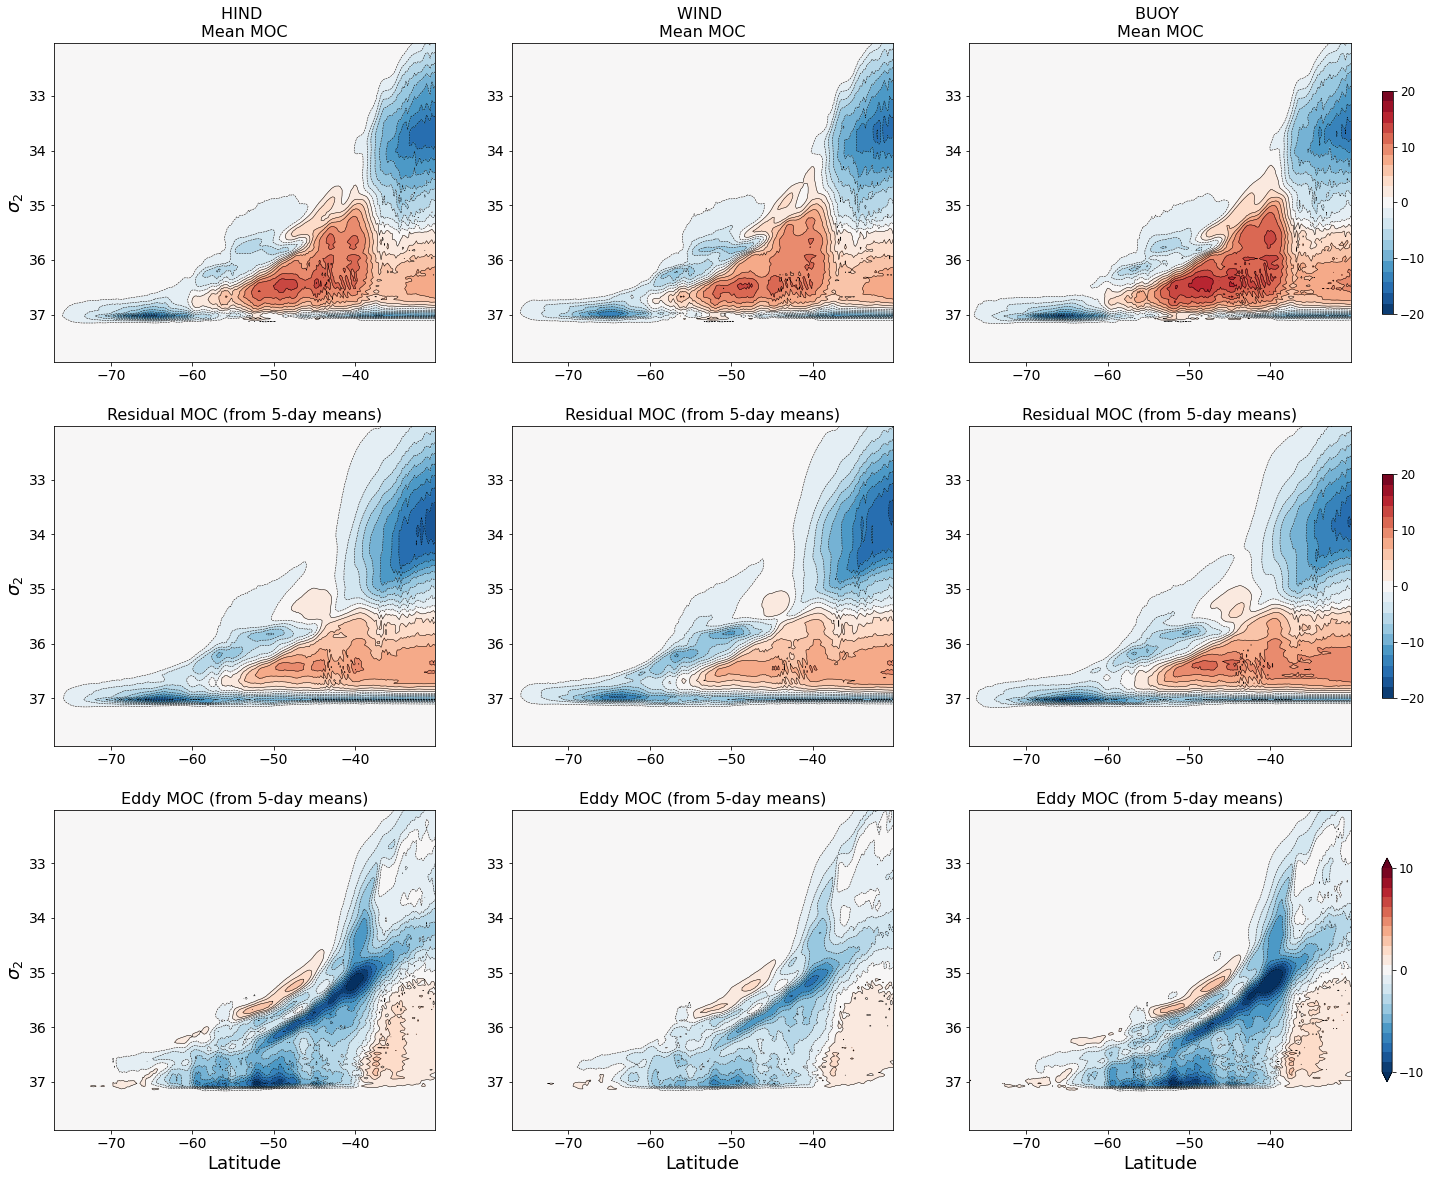

In [16]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize = (28,20))

# Mean
map1 = axs[0,0].contourf(map_mean_h.nav_lat.where(map_mean_h.nav_lat <= -30, drop=True), map_mean_h.sel(sigma=slice(32,38)).sigma, 
                         map_mean_h.sel(sigma=slice(32,38)).zomsfglo.where((map_mean_h.nav_lat <= -30), drop=True),
            levels=np.linspace(-20,20,22), cmap= 'RdBu_r', norm = colors.CenteredNorm(vcenter=0),
                   vmin=-20, vmax=20)
axs[0,0].contour(map_mean_h.nav_lat.where(map_mean_h.nav_lat <= -30, drop=True), map_mean_h.sel(sigma=slice(32,38)).sigma, 
                 map_mean_h.sel(sigma=slice(32,38)).zomsfglo.where(map_mean_h.nav_lat <= -30, drop=True), linewidths=0.5,
            levels=np.linspace(-20,20,22), colors= 'k')

#Residual from 1m
# map2 = axs[1,0].contourf(map_res_h.nav_lat.where(map_res_h.nav_lat <= -30, drop=True), map_res_h.sel(sigma=slice(32,38)).sigma, 
#                          map_res_h.sel(sigma=slice(32,38)).zomsfglo.where(map_res_h.nav_lat <= -30, drop=True),
#             levels=np.linspace(-20,20,22), cmap= 'RdBu_r', norm = colors.CenteredNorm(vcenter=0), vmin=-20, vmax=20)
# axs[1,0].contour(map_mean_h.nav_lat.where(map_mean_h.nav_lat <= -30, drop=True), map_mean_h.sel(sigma=slice(32,38)).sigma, 
#                  map_res_h.sel(sigma=slice(32,38)).zomsfglo.where(map_mean_h.nav_lat <= -30, drop=True), linewidths=0.5,
#             levels=np.linspace(-20,20,22), colors= 'k')

# Residual from 5d
map2 = axs[1,0].contourf(map_res5d_h.nav_lat.where(map_res5d_h.nav_lat <= -30, drop=True), map_res5d_h.sel(sigma=slice(32,38)).sigma, 
                         map_res5d_h.sel(sigma=slice(32,38)).zomsfglo.where(map_res5d_h.nav_lat <= -30, drop=True),
            levels=np.linspace(-20,20,22), cmap= 'RdBu_r', norm = colors.CenteredNorm(vcenter=0), vmin=-20, vmax=20)
axs[1,0].contour(map_mean_h.nav_lat.where(map_mean_h.nav_lat <= -30, drop=True), map_mean_h.sel(sigma=slice(32,38)).sigma, 
                 map_res5d_h.sel(sigma=slice(32,38)).zomsfglo.where(map_mean_h.nav_lat <= -30, drop=True), linewidths=0.5,
            levels=np.linspace(-20,20,22), colors= 'k')

# Eddy from 1m
# map3 = axs[2,0].contourf(map_mean_h.nav_lat.where(map_mean_h.nav_lat <= -30, drop=True), map_eddy_1m_h.sel(sigma=slice(32,38)).sigma, 
#                          map_eddy_1m_h.sel(sigma=slice(32,38)).where(map_mean_h.nav_lat <= -30, drop=True),
#             levels=np.linspace(-10,10,22), cmap= 'RdBu_r', norm = colors.CenteredNorm(vcenter=0),
#                    vmin=-10, vmax=10)
# axs[2,0].contour(map_mean_h.nav_lat.where(map_mean_h.nav_lat <= -30, drop=True), map_mean_h.sel(sigma=slice(32,38)).sigma, 
#                  map_eddy_1m_h.sel(sigma=slice(32,38)).where(map_mean_h.nav_lat <= -30, drop=True), linewidths=0.5,
#             levels=np.linspace(-10,10,22), colors= 'k')

# Eddy from 5d
map3 = axs[2,0].contourf(map_mean_h.nav_lat.where(map_mean_h.nav_lat <= -30, drop=True), map_eddy_5d_h.sel(sigma=slice(32,38)).sigma, 
                         map_eddy_5d_h.sel(sigma=slice(32,38)).where(map_mean_h.nav_lat <= -30, drop=True), np.linspace(-10,10,22),
            #levels=np.linspace(-10,10,22), 
                         cmap= 'RdBu_r', norm = colors.CenteredNorm(vcenter=0), extend='both',
                   vmin=-10, vmax=10)
axs[2,0].contour(map_mean_h.nav_lat.where(map_mean_h.nav_lat <= -30, drop=True), map_mean_h.sel(sigma=slice(32,38)).sigma, 
                 map_eddy_5d_h.sel(sigma=slice(32,38)).where(map_mean_h.nav_lat <= -30, drop=True), linewidths=0.5,
            levels=np.linspace(-10,10,22), colors= 'k')

# Mean
map4 = axs[0,1].contourf(map_mean_w.nav_lat.where(map_mean_w.nav_lat <= -30, drop=True), map_mean_w.sel(sigma=slice(32,38)).sigma, 
                         map_mean_w.sel(sigma=slice(32,38)).zomsfglo.where(map_mean_w.nav_lat <= -30, drop=True),
            levels=np.linspace(-20,20,22), cmap= 'RdBu_r', norm = colors.CenteredNorm(vcenter=0),
                  vmin=-20, vmax=20)
axs[0,1].contour(map_mean_w.nav_lat.where(map_mean_w.nav_lat <= -30, drop=True), map_mean_w.sel(sigma=slice(32,38)).sigma, 
                 map_mean_w.sel(sigma=slice(32,38)).zomsfglo.where(map_mean_w.nav_lat <= -30, drop=True), linewidths=0.5,
            levels=np.linspace(-20,20,22), colors= 'k')

# Residual from 1m
# map5 = axs[1,1].contourf(map_res_w.nav_lat.where(map_res_w.nav_lat <= -30, drop=True), map_res_w.sel(sigma=slice(32,38)).sigma, 
#                          map_res_w.sel(sigma=slice(32,38)).zomsfglo.where(map_res_w.nav_lat <= -30, drop=True),
#             levels=np.linspace(-20,20,22), cmap= 'RdBu_r', norm = colors.CenteredNorm(vcenter=0),
#                   vmin=-20, vmax=20)
# axs[1,1].contour(map_mean_w.nav_lat.where(map_mean_w.nav_lat <= -30, drop=True), map_mean_w.sel(sigma=slice(32,38)).sigma, 
#                  map_res_w.sel(sigma=slice(32,38)).zomsfglo.where(map_mean_w.nav_lat <= -30, drop=True), linewidths=0.5,
#             levels=np.linspace(-20,20,22), colors= 'k')

# Residual from 5d
map5 = axs[1,1].contourf(map_res5d_w.nav_lat.where(map_res5d_w.nav_lat <= -30, drop=True), map_res5d_w.sel(sigma=slice(32,38)).sigma, 
                         map_res5d_w.sel(sigma=slice(32,38)).zomsfglo.where(map_res5d_w.nav_lat <= -30, drop=True),
            levels=np.linspace(-20,20,22), cmap= 'RdBu_r', norm = colors.CenteredNorm(vcenter=0),
                  vmin=-20, vmax=20)
axs[1,1].contour(map_mean_w.nav_lat.where(map_mean_w.nav_lat <= -30, drop=True), map_mean_w.sel(sigma=slice(32,38)).sigma, 
                 map_res5d_w.sel(sigma=slice(32,38)).zomsfglo.where(map_mean_w.nav_lat <= -30, drop=True), linewidths=0.5,
            levels=np.linspace(-20,20,22), colors= 'k')

# Eddy from 1m
# map6 = axs[2,1].contourf(map_mean_w.nav_lat.where(map_mean_w.nav_lat <= -30, drop=True), map_eddy_1m_w.sel(sigma=slice(32,38)).sigma, 
#                          map_eddy_1m_w.sel(sigma=slice(32,38)).where(map_mean_w.nav_lat <= -30, drop=True),
#             levels=np.linspace(-10,10,22), cmap= 'RdBu_r', norm = colors.CenteredNorm(vcenter=0),
#                    vmin=-10, vmax=10)
# axs[2,1].contour(map_mean_w.nav_lat.where(map_mean_w.nav_lat <= -30, drop=True), map_mean_w.sel(sigma=slice(32,38)).sigma, 
#                  map_eddy_1m_w.sel(sigma=slice(32,38)).where(map_mean_w.nav_lat <= -30, drop=True), linewidths=0.5, 
#             levels=np.linspace(-10,10,22), colors= 'k')

#Eddy from 5d
map6 = axs[2,1].contourf(map_mean_w.nav_lat.where(map_mean_w.nav_lat <= -30, drop=True), map_eddy_5d_w.sel(sigma=slice(32,38)).sigma, 
                         map_eddy_5d_w.sel(sigma=slice(32,38)).where(map_mean_w.nav_lat <= -30, drop=True),
            levels=np.linspace(-15,15,22), cmap= 'RdBu_r', norm = colors.CenteredNorm(vcenter=0),
                   vmin=-10, vmax=10)
axs[2,1].contour(map_mean_w.nav_lat.where(map_mean_w.nav_lat <= -30, drop=True), map_mean_w.sel(sigma=slice(32,38)).sigma, 
                 map_eddy_5d_w.sel(sigma=slice(32,38)).where(map_mean_w.nav_lat <= -30, drop=True), linewidths=0.5, 
            levels=np.linspace(-15,15,22), colors= 'k')

# Mean
map7 = axs[0,2].contourf(map_mean_b.nav_lat.where(map_mean_b.nav_lat <= -30, drop=True), map_mean_b.sel(sigma=slice(32,38)).sigma, 
                         map_mean_b.sel(sigma=slice(32,38)).zomsfglo.where(map_mean_b.nav_lat <= -30, drop=True), 
            levels=np.linspace(-20,20,22), cmap= 'RdBu_r', norm = colors.CenteredNorm(vcenter=0),
                  vmin=-20, vmax=20)
axs[0,2].contour(map_mean_b.nav_lat.where(map_mean_b.nav_lat <= -30, drop=True), map_mean_b.sel(sigma=slice(32,38)).sigma, 
                 map_mean_b.sel(sigma=slice(32,38)).zomsfglo.where(map_mean_b.nav_lat <= -30, drop=True), linewidths=0.5,
            levels=np.linspace(-20,20,22), colors= 'k')

# Residual from 1m
# map8 = axs[1,2].contourf(map_res_b.nav_lat.where(map_res_b.nav_lat <= -30, drop=True), map_res_b.sel(sigma=slice(32,38)).sigma, 
#                          map_res_b.sel(sigma=slice(32,38)).zomsfglo.where(map_res_b.nav_lat <= -30, drop=True),
#             levels=np.linspace(-20,20,22), cmap= 'RdBu_r', norm = colors.CenteredNorm(vcenter=0),
#                   vmin=-20, vmax=20)
# axs[1,2].contour(map_mean_b.nav_lat.where(map_mean_b.nav_lat <= -30, drop=True), map_mean_b.sel(sigma=slice(32,38)).sigma, 
#                  map_res_b.sel(sigma=slice(32,38)).zomsfglo.where(map_mean_b.nav_lat <= -30, drop=True), linewidths=0.5,
#             levels=np.linspace(-20,20,22), colors= 'k')

# Residual from 5d
map8 = axs[1,2].contourf(map_res5d_b.nav_lat.where(map_res5d_b.nav_lat <= -30, drop=True), map_res5d_b.sel(sigma=slice(32,38)).sigma, 
                         map_res5d_b.sel(sigma=slice(32,38)).zomsfglo.where(map_res5d_b.nav_lat <= -30, drop=True),
            levels=np.linspace(-20,20,22), 
                         cmap= 'RdBu_r', norm = colors.CenteredNorm(vcenter=0),
                  vmin=-20, vmax=20)
axs[1,2].contour(map_mean_b.nav_lat.where(map_mean_b.nav_lat <= -30, drop=True), map_mean_b.sel(sigma=slice(32,38)).sigma, 
                 map_res5d_b.sel(sigma=slice(32,38)).zomsfglo.where(map_mean_b.nav_lat <= -30, drop=True), linewidths=0.5,
            levels=np.linspace(-20,20,22), colors= 'k')

# Eddy from 1m
# map9 = axs[2,2].contourf(map_mean_b.nav_lat.where(map_mean_b.nav_lat <= -30, drop=True), map_eddy_1m_b.sel(sigma=slice(32,38)).sigma, 
#                          map_eddy_1m_b.sel(sigma=slice(32,38)).where(map_mean_b.nav_lat <= -30, drop=True),
#             levels=np.linspace(-10,10,22), cmap= 'RdBu_r', norm = colors.CenteredNorm(vcenter=0),
#                    vmin=-10, vmax=10)
# axs[2,2].contour(map_mean_b.nav_lat.where(map_mean_b.nav_lat <= -30, drop=True), map_mean_b.sel(sigma=slice(32,38)).sigma, 
#                  map_eddy_1m_b.sel(sigma=slice(32,38)).where(map_mean_b.nav_lat <= -30, drop=True), linewidths=0.5,
#             levels=np.linspace(-10,10,22), colors= 'k')

# Eddy from 5d
map9 = axs[2,2].contourf(map_mean_b.nav_lat.where(map_mean_b.nav_lat <= -30, drop=True), map_eddy_5d_b.sel(sigma=slice(32,38)).sigma, 
                         map_eddy_5d_b.sel(sigma=slice(32,38)).where(map_mean_b.nav_lat <= -30, drop=True), np.linspace(-10,10,22),
            #levels=np.linspace(-10,10,22), 
                         cmap= 'RdBu_r', norm = colors.CenteredNorm(vcenter=0), extend='both',
                   vmin=-10, vmax=10)
axs[2,2].contour(map_mean_b.nav_lat.where(map_mean_b.nav_lat <= -30, drop=True), map_mean_b.sel(sigma=slice(32,38)).sigma, 
                 map_eddy_5d_b.sel(sigma=slice(32,38)).where(map_mean_b.nav_lat <= -30, drop=True), linewidths=0.5,
            levels=np.linspace(-10,10,22), colors= 'k')


for i, maps in zip(np.arange(0,3), [map1, map2, map3]):
    c = plt.colorbar(maps, pad=0.02, shrink=0.7, ax=axs[i,0:3])
    c.set_ticks([-20, -10, 0, 10, 20])
    if maps == map3:
        c.set_ticks([-10, 0, 10])
        c.set_ticks([-10, 0, 10])
    c.ax.tick_params(labelsize=12)
    axs[1,i].set_title('Residual MOC (from 5-day means)', fontsize=16)
    axs[2,i].set_title('Eddy MOC (from 5-day means)', fontsize=16)
    axs[2,i].set_xlabel('Latitude', fontsize=18)
    axs[i,0].set_ylabel('$\sigma_2$', fontsize=18)

axs[0,0].set_title('HIND \nMean MOC', fontsize=16)
axs[0,1].set_title('WIND \nMean MOC', fontsize=16)
axs[0,2].set_title('BUOY \nMean MOC', fontsize=16)

    
for ax in axs.flat:    
    ax.yaxis.set_tick_params(labelsize = 14)
    ax.xaxis.set_tick_params(labelsize = 14)
    ax.invert_yaxis()

savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/figures/'
plt.savefig(savepath + 'ORCA025_KLP002_MOC_section_from5d.png', format='png', facecolor="w",  bbox_inches='tight')
    # plt.tight_layout()

## time series

In [6]:
#In a separate you can plot the time series of residual and eddy MOC computed
# respectively as the maximum and minimum of the streamfunction between
# 40S-60S, as well as the bottom MOC

In [4]:
moc_eddy_1m_h = (moc_res_h.zomsfglo - moc_mean_h.zomsfglo).compute()
# moc_eddy_1m_w = (moc_res_w.zomsfglo - moc_mean_w.zomsfglo).compute()
# moc_eddy_1m_b = (moc_res_b.zomsfglo - moc_mean_b.zomsfglo).compute()

moc_eddy_1m_h = moc_eddy_1m_h.to_dataset().assign(nav_lat = moc_res_h.nav_lat)
# moc_eddy_1m_w = moc_eddy_1m_w.to_dataset().assign(nav_lat = moc_res_h.nav_lat)
# moc_eddy_1m_b = moc_eddy_1m_b.to_dataset().assign(nav_lat = moc_res_h.nav_lat)

moc_res5d_h['time_counter'] = moc_mean_h.time_counter# - moc_mean_h.zomsfglo.time_counter
# moc_res5d_w['time_counter'] = moc_mean_w.time_counter# - moc_mean_h.zomsfglo.time_counter
# moc_res5d_b['time_counter'] = moc_mean_b.time_counter# - moc_mean_h.zomsfglo.time_counter

moc_eddy_5d_h = (moc_res5d_h.zomsfglo - moc_mean_h.zomsfglo).compute()
# moc_eddy_5d_w = (moc_res5d_w.zomsfglo - moc_mean_w.zomsfglo).compute()
# moc_eddy_5d_b = (moc_res5d_b.zomsfglo - moc_mean_b.zomsfglo).compute()

moc_eddy_5d_h = moc_eddy_5d_h.to_dataset().assign(nav_lat = moc_res_h.nav_lat)
# moc_eddy_5d_w = moc_eddy_5d_w.to_dataset().assign(nav_lat = moc_res_h.nav_lat)
# moc_eddy_5d_b = moc_eddy_5d_b.to_dataset().assign(nav_lat = moc_res_h.nav_lat)

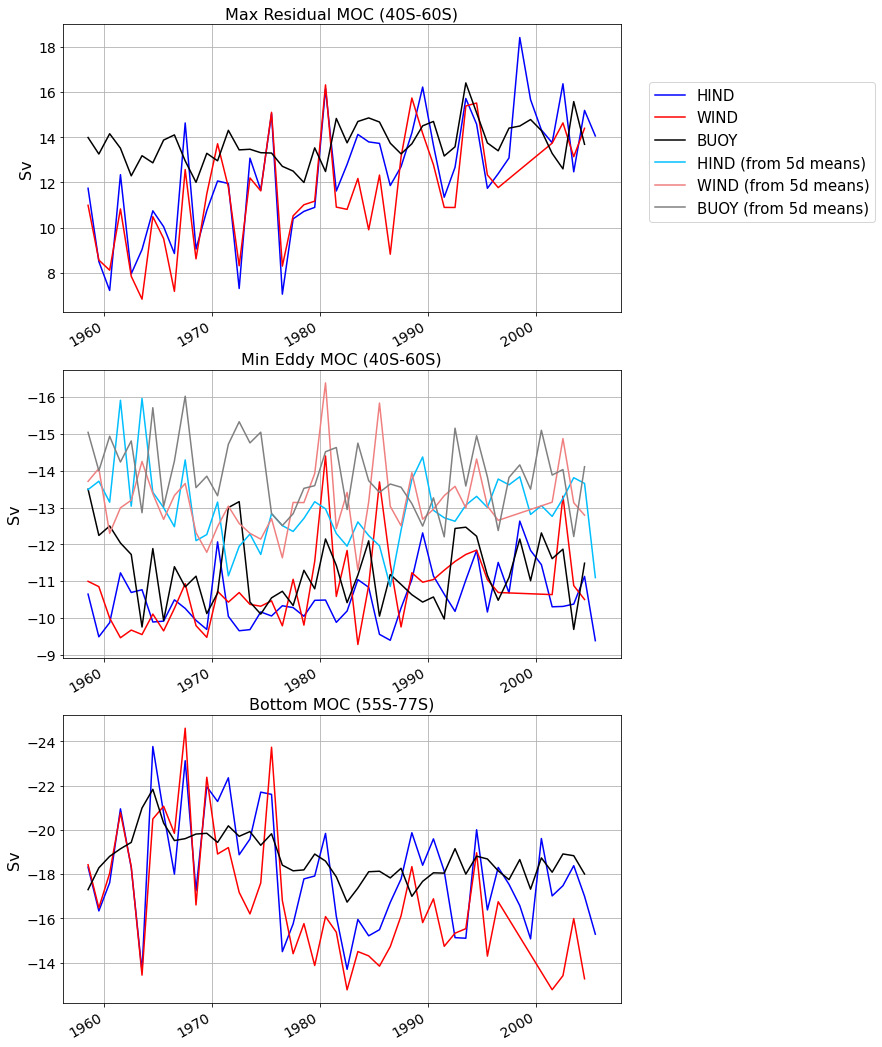

In [11]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize = (10,18))

moc_res_h.where((moc_res_h.nav_lat >= -60) & (moc_res_h.nav_lat <=-40), drop=True).zomsfglo.max(['sigma', 'y']).plot(label = 'HIND', color= 'blue', ax=axs[0])
moc_res_w.where((moc_res_w.nav_lat >= -60) & (moc_res_w.nav_lat <=-40), drop=True).zomsfglo.max(['sigma', 'y']).plot(label = 'WIND', color= 'red', ax=axs[0])
moc_res_b.where((moc_res_b.nav_lat >= -60) & (moc_res_b.nav_lat <=-40), drop=True).zomsfglo.max(['sigma', 'y']).plot(label = 'BUOY', color= 'black', ax=axs[0])

moc_eddy_1m_h.where((moc_eddy_1m_h.nav_lat >= -60) & (moc_eddy_1m_h.nav_lat <=-40), drop=True).zomsfglo.min(['sigma', 'y']).plot(label = 'HIND', color= 'blue', ax=axs[1])
moc_eddy_1m_w.where((moc_eddy_1m_w.nav_lat >= -60) & (moc_eddy_1m_w.nav_lat <=-40), drop=True).zomsfglo.min(['sigma', 'y']).plot(label = 'WIND', color= 'red', ax=axs[1])
moc_eddy_1m_b.where((moc_eddy_1m_b.nav_lat >= -60) & (moc_eddy_1m_b.nav_lat <=-40), drop=True).zomsfglo.min(['sigma', 'y']).plot(label = 'BUOY', color= 'black', ax=axs[1])

moc_eddy_5d_h.where((moc_eddy_5d_h.nav_lat >= -60) & (moc_eddy_5d_h.nav_lat <=-40), drop=True).zomsfglo.min(['sigma', 'y']).plot(label = 'HIND (from 5d means)', color= 'deepskyblue', ax=axs[1])
moc_eddy_5d_w.where((moc_eddy_5d_w.nav_lat >= -60) & (moc_eddy_5d_w.nav_lat <=-40), drop=True).zomsfglo.min(['sigma', 'y']).plot(label = 'WIND (from 5d means)', color= 'lightcoral', ax=axs[1])
moc_eddy_5d_b.where((moc_eddy_5d_b.nav_lat >= -60) & (moc_eddy_5d_b.nav_lat <=-40), drop=True).zomsfglo.min(['sigma', 'y']).plot(label = 'BUOY (from 5d means)', color= 'grey', ax=axs[1])

moc_res_h.where((moc_res_h.nav_lat >= -77) & (moc_res_h.nav_lat <=-55), drop=True).zomsfglo.min(['sigma', 'y']).plot(label = 'HIND', color= 'blue', ax=axs[2])
moc_res_w.where((moc_res_w.nav_lat >= -77) & (moc_res_w.nav_lat <=-55), drop=True).zomsfglo.min(['sigma', 'y']).plot(label = 'WIND', color= 'red', ax=axs[2])
moc_res_b.where((moc_res_b.nav_lat >= -77) & (moc_res_b.nav_lat <=-55), drop=True).zomsfglo.min(['sigma', 'y']).plot(label = 'BUOY', color= 'black', ax=axs[2])

axs[0].set_title('Max Residual MOC (40S-60S)', fontsize=16)
axs[1].set_title('Min Eddy MOC (40S-60S)', fontsize=16)
axs[2].set_title('Bottom MOC (55S-77S)', fontsize=16)

axs[1].invert_yaxis()
axs[2].invert_yaxis()

for ax in axs.flat:
    ax.grid()
    ax.set_ylabel('Sv', fontsize=16)
    ax.set_xlabel(None)
    ax.yaxis.set_tick_params(labelsize = 14)
    ax.xaxis.set_tick_params(labelsize = 14)
    
#adding legend next to the plot
leg = axs[1].legend(bbox_to_anchor=(1.05, 2), loc='upper left', borderaxespad=0., fontsize=15)

savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/figures/'
plt.savefig(savepath + 'ORCA025_KLP002_MOC_timeseries.png', format='png', facecolor="w",  bbox_inches='tight')

## MOC calculated by notebook (Rene)

In [5]:
# path
path_orca = '/scratch/usr/shkifmmp/MOC/ORCA025/hind/MOC_nb/'

In [6]:
# moc_5d = xr.open_mfdataset(sorted(glob(path_orca + 'from_5d/O*nc')))
# moc_1mt = xr.open_mfdataset(sorted(glob(path_orca + 'from_1m_r2000/test/O*nc')))
moc_5d = xr.open_mfdataset(sorted(glob(path_orca + 'from_5d_r2000/sigma_adjusted/O*nc')))
# moc_1m = xr.open_mfdataset(sorted(glob(path_orca + 'from_1m_r2000/O*nc')))
moc_1y = xr.open_mfdataset(sorted(glob(path_orca + 'from_1y_r2000/O*nc'))) # mean moc
moc_1m = xr.open_mfdataset(sorted(glob(path_orca + 'from_1m_r2000/sigma_adjusted/O*nc')))

In [8]:
moc_1m.where((moc_1m.y >= -60) & (moc_1m.y <=-40), drop=True).moc.max(['sigma','y']).plot()

NameError: name 'moc_1m' is not defined

In [14]:
moc_1m_r0t = xr.open_mfdataset(sorted(glob(path_orca + 'from_1m_r0/test/O*nc')))

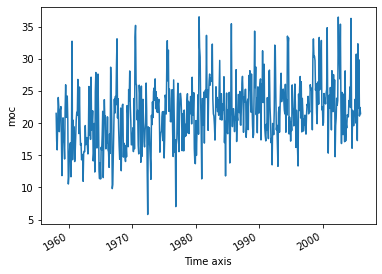

In [46]:
moc_1mt2.where((moc_1mt2.y >= -60) & (moc_1mt2.y <=-40), drop=True).moc.max(['sigma','y']).plot()

In [7]:
moc_1m = moc_1m.groupby('time_counter.year').mean('time_counter') #residual
moc_5d = moc_5d.groupby('time_counter.year').mean('time_counter') #residual

In [8]:
moc_1m = moc_1m.sel(year= slice('1958','2005'))
moc_5d = moc_5d.sel(year= slice('1958','2005'))

In [11]:
moc_1y.coords['time_counter'] = moc_1m.coords['year'].values

In [12]:
moc_1m = moc_1m.rename({'year':'time_counter'})
moc_5d = moc_5d.rename({'year':'time_counter'})

In [13]:
eddy_f1m = moc_1m - moc_1y
eddy_f5d = moc_5d - moc_1y

In [14]:
time_plot = pd.to_datetime(pd.DataFrame({'year': moc_1m.time_counter.values, 'month': 7, 'day':1}))

In [ ]:
time_plot

In [20]:
# moc_1m.coords['time_counter'] = moc_res_h.time_counter.values
moc_5d.coords['time_counter'] = moc_res_h.time_counter.values
eddy_f1m.coords['time_counter'] = moc_res_h.time_counter.values
eddy_f5d.coords['time_counter'] = moc_res_h.time_counter.values

In [19]:
moc_1m

<xarray.Dataset>
Dimensions:       (y: 1021, sigma: 79, time_counter: 48)
Coordinates:
  * y             (y) float32 -76.98 -76.93 -76.87 -76.81 ... 89.93 89.93 89.84
  * sigma         (sigma) float64 30.05 30.15 30.25 30.35 ... 37.65 37.75 37.85
  * time_counter  (time_counter) datetime64[ns] 1958-07-01T17:00:00 ... 2005-...
Data variables:
    moc           (time_counter, sigma, y) float64 dask.array<chunksize=(1, 79, 1021), meta=np.ndarray>

### adding the MOC referenced at surface

In [19]:
# moc_res_0 = xr.open_mfdataset(paths= sorted(glob(path_hind + 'MOC_r0/' + 'OR*from1m_mocsig2_res.nc')),
#                          chunks= {'y': 100}).squeeze()

# moc_res5d_0 = xr.open_mfdataset(paths= sorted(glob(path_hind + 'MOC_r0/' + 'OR*from5d_mocsig2_res.nc')),
#                          chunks= {'y': 100}).squeeze()

# moc_mean_0 = xr.open_mfdataset(paths= sorted(glob(path_hind + 'MOC_r0/' + 'OR*mocsig2_mean.nc')),
#                          chunks= {'y': 100}).squeeze()

In [26]:
# moc_res5d_0 = moc_res5d_0.sel(time_counter=slice('1958','2005'))

In [24]:
# moc_res_0 = moc_res_0.sel(time_counter=slice('1958','2005'))

In [27]:
# moc_eddy_1m_0 = (moc_res_0.zomsfglo - moc_mean_0.zomsfglo).compute()

# moc_eddy_1m_0 = moc_eddy_1m_0.to_dataset().assign(nav_lat = moc_res_0.nav_lat)

# moc_res5d_0['time_counter'] = moc_mean_0.time_counter# - moc_mean_h.zomsfglo.time_counter

# moc_eddy_5d_0 = (moc_res5d_0.zomsfglo - moc_mean_0.zomsfglo).compute()

# moc_eddy_5d_0 = moc_eddy_5d_0.to_dataset().assign(nav_lat = moc_res_0.nav_lat)

### plotting

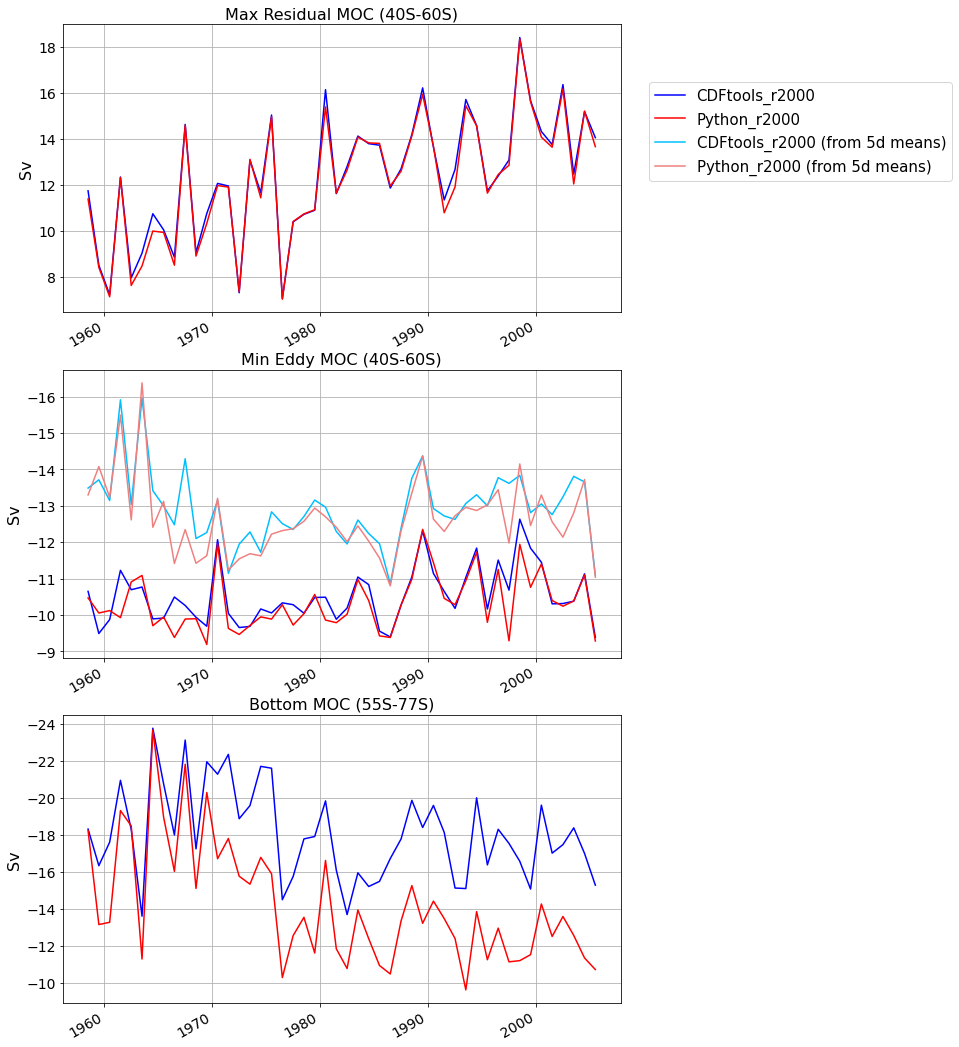

In [23]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize = (10,18))

moc_res_h.where((moc_res_h.nav_lat >= -60) & (moc_res_h.nav_lat <=-40), drop=True).zomsfglo.max(['sigma', 'y']).plot(label = 'CDFtools_r2000', color= 'blue', ax=axs[0])
# moc_res_0.where((moc_res_0.nav_lat >= -60) & (moc_res_0.nav_lat <=-40), drop=True).zomsfglo.max(['sigma', 'y']).plot(label = 'CDFtools_r0', color= 'tab:green', ax=axs[0])
moc_1m.where((moc_1m.y >= -60) & (moc_1m.y <=-40), drop=True).moc.max(['sigma','y']).plot(color='red', ax=axs[0])


moc_eddy_1m_h.where((moc_eddy_1m_h.nav_lat >= -60) & (moc_eddy_1m_h.nav_lat <=-40), drop=True).zomsfglo.min(['sigma', 'y']).plot(label = 'CDFtools_r2000', color= 'blue', ax=axs[1])
# moc_eddy_1m_0.where((moc_eddy_1m_0.nav_lat >= -60) & (moc_eddy_1m_0.nav_lat <=-40), drop=True).zomsfglo.min(['sigma', 'y']).plot(label = 'CDFtools_r0', color= 'tab:green', ax=axs[1])
eddy_f1m.where((eddy_f1m.y >= -60) & (eddy_f1m.y <=-40), drop=True).moc.min(['sigma','y']).plot(label='Python_r2000', color='red', ax=axs[1])

moc_eddy_5d_h.where((moc_eddy_5d_h.nav_lat >= -60) & (moc_eddy_5d_h.nav_lat <=-40), drop=True).zomsfglo.min(['sigma', 'y']).plot(label = 'CDFtools_r2000 (from 5d means)', color= 'deepskyblue', ax=axs[1])
# moc_eddy_5d_0.where((moc_eddy_5d_0.nav_lat >= -60) & (moc_eddy_5d_0.nav_lat <=-40), drop=True).zomsfglo.min(['sigma', 'y']).plot(label = 'CDFtools_r0 (from 5d means)', color= 'lawngreen', ax=axs[1])
eddy_f5d.where((eddy_f5d.y >= -60) & (eddy_f5d.y <=-40), drop=True).moc.min(['sigma','y']).plot(label='Python_r2000 (from 5d means)', color='lightcoral', ax=axs[1])

moc_res_h.where((moc_res_h.nav_lat >= -77) & (moc_res_h.nav_lat <=-55), drop=True).zomsfglo.min(['sigma', 'y']).plot(label = 'CDFtools_r2000', color= 'blue', ax=axs[2])
# moc_res_0.where((moc_res_0.nav_lat >= -77) & (moc_res_0.nav_lat <=-55), drop=True).zomsfglo.min(['sigma', 'y']).plot(label = 'CDFtools_r0', color= 'tab:green', ax=axs[2])
moc_1m.where((moc_1m.y >= -77) & (moc_1m.y <=-55), drop=True).moc.min(['sigma', 'y']).plot(color= 'red', ax=axs[2])

axs[0].set_title('Max Residual MOC (40S-60S)', fontsize=16)
axs[1].set_title('Min Eddy MOC (40S-60S)', fontsize=16)
axs[2].set_title('Bottom MOC (55S-77S)', fontsize=16)

axs[1].invert_yaxis()
axs[2].invert_yaxis()

for ax in axs.flat:
    ax.grid()
    ax.set_ylabel('Sv', fontsize=16)
    ax.set_xlabel(None)
    ax.yaxis.set_tick_params(labelsize = 14)
    ax.xaxis.set_tick_params(labelsize = 14)
    
#adding legend next to the plot
leg = axs[1].legend(bbox_to_anchor=(1.05, 2), loc='upper left', borderaxespad=0., fontsize=15)

savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/figures/'
plt.savefig(savepath + 'ORCA025_KLP002_MOC_timeseries_hind_comparison_r2000.png', format='png', facecolor="w",  bbox_inches='tight')

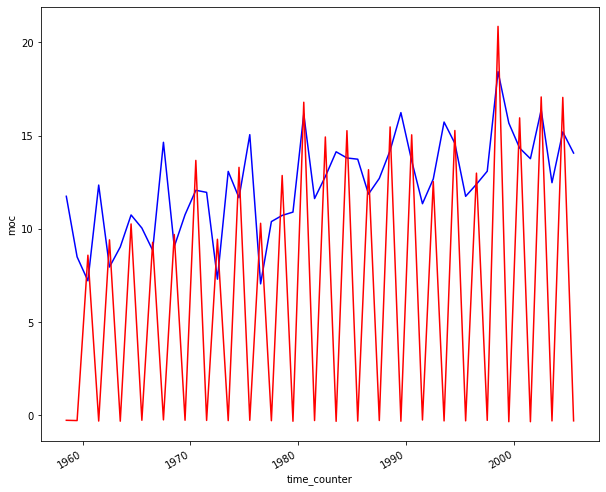

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (10,8))
moc_res_h.where((moc_res_h.nav_lat >= -60) & (moc_res_h.nav_lat <=-40), drop=True).zomsfglo.max(['sigma', 'y']).plot(label = 'CDFtools_r2000', color= 'blue', ax=axs)
moc_1m.where((moc_1m.y >= -60) & (moc_1m.y <=-40), drop=True).moc.max(['sigma','y']).plot(label='PYTHON_r0', color='red', ax=axs)

In [12]:
# maps

#monthly
map_res_h = moc_res_h.isel(time_counter=0)

#5-day
map_res5d_h = moc_res5d_h.isel(time_counter=0)

map_mean_h = moc_mean_h.isel(time_counter=0)


# from 1m
map_eddy_1m_h = map_res_h.zomsfglo - map_mean_h.zomsfglo

# from 55
map_eddy_5d_h = map_res5d_h.zomsfglo - map_mean_h.zomsfglo

NameError: name 'moc_res_h' is not defined

In [13]:
map_res_py = moc_1m.isel(time_counter=0)
map_eddy_py = eddy_f1m.isel(time_counter=0)
map_mean = moc_1y.isel(time_counter=0)

In [53]:
map_res5d_h

<xarray.Dataset>
Dimensions:       (y: 1021, sigma: 158)
Coordinates:
  * sigma         (sigma) float32 30.02 30.08 30.12 30.17 ... 37.78 37.83 37.88
    time_counter  datetime64[ns] 1962-07-01T17:00:00
Dimensions without coordinates: y
Data variables:
    nav_lon       (y) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    nav_lat       (y) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    zomsfglo      (sigma, y) float32 dask.array<chunksize=(158, 100), meta=np.ndarray>
Attributes:
    start_date:        -1
    output_frequency:  N/A
    CONFIG:            N/A
    CASE:              N/A
    history:           Mon Nov 29 18:59:07 2021: /sw/dataformats/nco/4.9.1/sk...
    NCO:               netCDF Operators version 4.9.1 (Homepage = http://nco....

NameError: name 'map1' is not defined

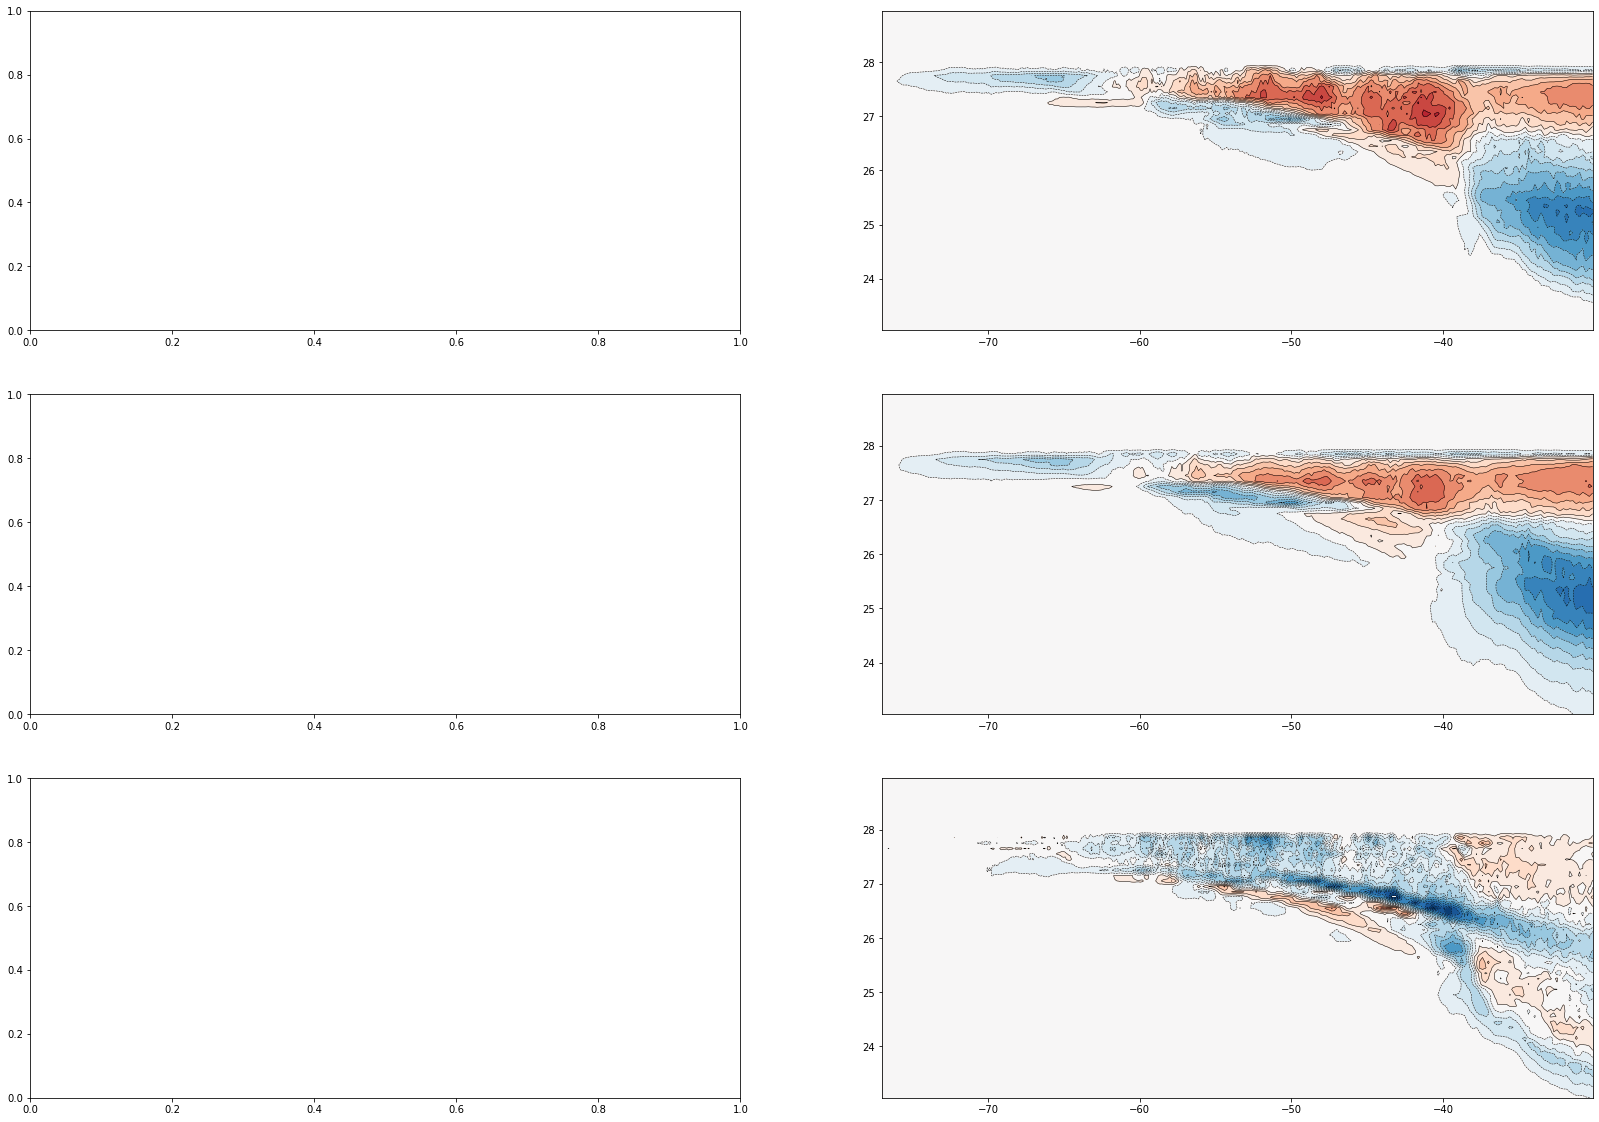

In [14]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize = (28,20))

# Mean
map1 = axs[0,0].contourf(map_mean_h.nav_lat.where(map_mean_h.nav_lat <= -30, drop=True), map_mean_h.sel(sigma=slice(32,38)).sigma, 
                         map_mean_h.sel(sigma=slice(32,38)).zomsfglo.where((map_mean_h.nav_lat <= -30), drop=True),
            levels=np.linspace(-20,20,22), cmap= 'RdBu_r', norm = colors.CenteredNorm(vcenter=0),
                   vmin=-20, vmax=20)
axs[0,0].contour(map_mean_h.nav_lat.where(map_mean_h.nav_lat <= -30, drop=True), map_mean_h.sel(sigma=slice(32,38)).sigma, 
                 map_mean_h.sel(sigma=slice(32,38)).zomsfglo.where(map_mean_h.nav_lat <= -30, drop=True), linewidths=0.5,
            levels=np.linspace(-20,20,22), colors= 'k')

# # Residual from 1m
map2 = axs[1,0].contourf(map_res_h.nav_lat.where(map_res_h.nav_lat <= -30, drop=True), map_res_h.sel(sigma=slice(32,38)).sigma, 
                         map_res_h.sel(sigma=slice(32,38)).zomsfglo.where(map_res_h.nav_lat <= -30, drop=True),
            levels=np.linspace(-20,20,22), cmap= 'RdBu_r', norm = colors.CenteredNorm(vcenter=0), vmin=-20, vmax=20)
axs[1,0].contour(map_mean_h.nav_lat.where(map_mean_h.nav_lat <= -30, drop=True), map_mean_h.sel(sigma=slice(32,38)).sigma, 
                 map_res_h.sel(sigma=slice(32,38)).zomsfglo.where(map_mean_h.nav_lat <= -30, drop=True), linewidths=0.5,
            levels=np.linspace(-20,20,22), colors= 'k')

# # Residual from 5d
# map2 = axs[1,0].contourf(map_res5d_h.nav_lat.where(map_res5d_h.nav_lat <= -30, drop=True), map_res5d_h.sel(sigma=slice(32,38)).sigma, 
#                          map_res5d_h.sel(sigma=slice(32,38)).zomsfglo.where(map_res5d_h.nav_lat <= -30, drop=True),
#             levels=np.linspace(-20,20,22), cmap= 'RdBu_r', norm = colors.CenteredNorm(vcenter=0), vmin=-20, vmax=20)
# axs[1,0].contour(map_mean_h.nav_lat.where(map_mean_h.nav_lat <= -30, drop=True), map_mean_h.sel(sigma=slice(32,38)).sigma, 
#                  map_res5d_h.sel(sigma=slice(32,38)).zomsfglo.where(map_mean_h.nav_lat <= -30, drop=True), linewidths=0.5,
#             levels=np.linspace(-20,20,22), colors= 'k')

# Eddy from 1m
map3 = axs[2,0].contourf(map_mean_h.nav_lat.where(map_mean_h.nav_lat <= -30, drop=True), map_eddy_1m_h.sel(sigma=slice(32,38)).sigma, 
                         map_eddy_1m_h.sel(sigma=slice(32,38)).where(map_mean_h.nav_lat <= -30, drop=True),
            levels=np.linspace(-10,10,22), cmap= 'RdBu_r', norm = colors.CenteredNorm(vcenter=0),
                   vmin=-10, vmax=10)
axs[2,0].contour(map_mean_h.nav_lat.where(map_mean_h.nav_lat <= -30, drop=True), map_mean_h.sel(sigma=slice(32,38)).sigma, 
                 map_eddy_1m_h.sel(sigma=slice(32,38)).where(map_mean_h.nav_lat <= -30, drop=True), linewidths=0.5,
            levels=np.linspace(-10,10,22), colors= 'k')

# Eddy from 5d
# map3 = axs[2,0].contourf(map_mean_h.nav_lat.where(map_mean_h.nav_lat <= -30, drop=True), map_eddy_5d_h.sel(sigma=slice(32,38)).sigma, 
#                          map_eddy_5d_h.sel(sigma=slice(32,38)).where(map_mean_h.nav_lat <= -30, drop=True), np.linspace(-10,10,22),
#             #levels=np.linspace(-10,10,22), 
#                          cmap= 'RdBu_r', norm = colors.CenteredNorm(vcenter=0), extend='both',
#                    vmin=-10, vmax=10)
# axs[2,0].contour(map_mean_h.nav_lat.where(map_mean_h.nav_lat <= -30, drop=True), map_mean_h.sel(sigma=slice(32,38)).sigma, 
#                  map_eddy_5d_h.sel(sigma=slice(32,38)).where(map_mean_h.nav_lat <= -30, drop=True), linewidths=0.5,
#             levels=np.linspace(-10,10,22), colors= 'k')

# Mean
map4 = axs[0,1].contourf(map_mean.y.where(moc_1y.isel(time_counter=4).y <= -30, drop=True), map_mean.sel(sigma=slice(23,29)).sigma, 
                         map_mean.sel(sigma=slice(23,29)).moc.where(map_mean.y <= -30, drop=True),
            levels=np.linspace(-20,20,22), cmap= 'RdBu_r', norm = colors.CenteredNorm(vcenter=0),
                  vmin=-20, vmax=20)
axs[0,1].contour(map_mean.y.where(map_mean.y <= -30, drop=True), map_mean.sel(sigma=slice(23,29)).sigma, 
                 map_mean.sel(sigma=slice(23,29)).moc.where(map_mean.y <= -30, drop=True), linewidths=0.5,
            levels=np.linspace(-20,20,22), colors= 'k')

# Residual from 1m
map5 = axs[1,1].contourf(map_res_py.y.where(map_res_py.y <= -30, drop=True), map_res_py.sel(sigma=slice(23,29)).sigma, 
                         map_res_py.sel(sigma=slice(23,29)).moc.where(map_res_py.y <= -30, drop=True),
            levels=np.linspace(-20,20,22), cmap= 'RdBu_r', norm = colors.CenteredNorm(vcenter=0),
                  vmin=-20, vmax=20)
axs[1,1].contour(map_res_py.y.where(map_res_py.y <= -30, drop=True), map_res_py.sel(sigma=slice(23,29)).sigma, 
                 map_res_py.sel(sigma=slice(23,29)).moc.where(map_res_py.y <= -30, drop=True), linewidths=0.5,
            levels=np.linspace(-20,20,22), colors= 'k')

# Residual from 5d
# map5 = axs[1,1].contourf(map_res5d_w.nav_lat.where(map_res5d_w.nav_lat <= -30, drop=True), map_res5d_w.sel(sigma=slice(32,38)).sigma, 
#                          map_res5d_w.sel(sigma=slice(32,38)).zomsfglo.where(map_res5d_w.nav_lat <= -30, drop=True),
#             levels=np.linspace(-20,20,22), cmap= 'RdBu_r', norm = colors.CenteredNorm(vcenter=0),
#                   vmin=-20, vmax=20)
# axs[1,1].contour(map_mean_w.nav_lat.where(map_mean_w.nav_lat <= -30, drop=True), map_mean_w.sel(sigma=slice(32,38)).sigma, 
#                  map_res5d_w.sel(sigma=slice(32,38)).zomsfglo.where(map_mean_w.nav_lat <= -30, drop=True), linewidths=0.5,
#             levels=np.linspace(-20,20,22), colors= 'k')

# Eddy from 1m
map6 = axs[2,1].contourf(map_eddy_py.y.where(map_eddy_py.y <= -30, drop=True), map_eddy_py.sel(sigma=slice(23,29)).sigma, 
                         map_eddy_py.sel(sigma=slice(23,29)).moc.where(map_eddy_py.y <= -30, drop=True),
            levels=np.linspace(-10,10,22), cmap= 'RdBu_r', norm = colors.CenteredNorm(vcenter=0),
                   vmin=-10, vmax=10)
axs[2,1].contour(map_eddy_py.y.where(map_eddy_py.y <= -30, drop=True), map_eddy_py.sel(sigma=slice(23,29)).sigma, 
                 map_eddy_py.sel(sigma=slice(23,29)).moc.where(map_eddy_py.y <= -30, drop=True), linewidths=0.5, 
            levels=np.linspace(-10,10,22), colors= 'k')

#Eddy from 5d
# map6 = axs[2,1].contourf(map_mean_w.nav_lat.where(map_mean_w.nav_lat <= -30, drop=True), map_eddy_5d_w.sel(sigma=slice(32,38)).sigma, 
#                          map_eddy_5d_w.sel(sigma=slice(32,38)).where(map_mean_w.nav_lat <= -30, drop=True),
#             levels=np.linspace(-15,15,22), cmap= 'RdBu_r', norm = colors.CenteredNorm(vcenter=0),
#                    vmin=-10, vmax=10)
# axs[2,1].contour(map_mean_w.nav_lat.where(map_mean_w.nav_lat <= -30, drop=True), map_mean_w.sel(sigma=slice(32,38)).sigma, 
#                  map_eddy_5d_w.sel(sigma=slice(32,38)).where(map_mean_w.nav_lat <= -30, drop=True), linewidths=0.5, 
#             levels=np.linspace(-15,15,22), colors= 'k')



for i, maps in zip(np.arange(0,3), [map1, map2, map3]):
    c = plt.colorbar(maps, pad=0.02, shrink=0.7, ax=axs[i,0:2])
    c.set_ticks([-20, -10, 0, 10, 20])
    if maps == map3:
        c.set_ticks([-10, 0, 10])
    c.ax.tick_params(labelsize=12)
    axs[1,i-1].set_title('Residual MOC (from 1m means)', fontsize=16)
    axs[2,i-1].set_title('Eddy MOC (from 1m means)', fontsize=16)
    axs[2,i-1].set_xlabel('Latitude', fontsize=18)
    axs[i,0].set_ylabel('$\sigma_2$', fontsize=18)

axs[0,0].set_title('CDFtools \nMean MOC', fontsize=16)
axs[0,1].set_title('Python \nMean MOC', fontsize=16)
# axs[0,2].set_title('BUOY \nMean MOC', fontsize=16)

    
for ax in axs.flat:    
    ax.yaxis.set_tick_params(labelsize = 14)
    ax.xaxis.set_tick_params(labelsize = 14)
    ax.invert_yaxis()

savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/figures/'
plt.savefig(savepath + 'ORCA025_KLP002_MOC_section_from1m_diff.png', format='png', facecolor="w",  bbox_inches='tight')
    # plt.tight_layout()

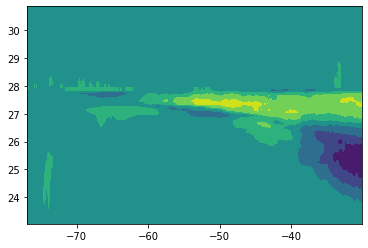

In [40]:
plt.contourf(map_res_py.y.where(map_res_py.y <= -30, drop=True), map_res_py.sigma, 
                         map_res_py.moc.where(map_res_py.y <= -30, drop=True))

In [39]:
map_res_py.sigma

<xarray.DataArray 'sigma' (sigma: 79)>
array([23.05, 23.15, 23.25, 23.35, 23.45, 23.55, 23.65, 23.75, 23.85, 23.95,
       24.05, 24.15, 24.25, 24.35, 24.45, 24.55, 24.65, 24.75, 24.85, 24.95,
       25.05, 25.15, 25.25, 25.35, 25.45, 25.55, 25.65, 25.75, 25.85, 25.95,
       26.05, 26.15, 26.25, 26.35, 26.45, 26.55, 26.65, 26.75, 26.85, 26.95,
       27.05, 27.15, 27.25, 27.35, 27.45, 27.55, 27.65, 27.75, 27.85, 27.95,
       28.05, 28.15, 28.25, 28.35, 28.45, 28.55, 28.65, 28.75, 28.85, 28.95,
       29.05, 29.15, 29.25, 29.35, 29.45, 29.55, 29.65, 29.75, 29.85, 29.95,
       30.05, 30.15, 30.25, 30.35, 30.45, 30.55, 30.65, 30.75, 30.85])
Coordinates:
  * sigma         (sigma) float64 23.05 23.15 23.25 23.35 ... 30.65 30.75 30.85
    time_counter  datetime64[ns] 1962-07-01

In [52]:
map_mean_h

<xarray.Dataset>
Dimensions:       (y: 1021, sigma: 158)
Coordinates:
  * sigma         (sigma) float32 30.02 30.08 30.12 30.17 ... 37.78 37.83 37.88
    time_counter  datetime64[ns] 1962-07-01T17:00:00
Dimensions without coordinates: y
Data variables:
    nav_lon       (y) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    nav_lat       (y) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    zomsfglo      (sigma, y) float32 dask.array<chunksize=(158, 100), meta=np.ndarray>
Attributes:
    start_date:        -1
    output_frequency:  N/A
    CONFIG:            N/A
    CASE:              N/A
    history:           Partial step computation ; /home/shkifmms/local/bin/cd...